<a href="https://colab.research.google.com/github/Yashwanth-b-k/house_price_prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [42]:
!pip install numpy pandas matplotlib seaborn scikit-learn

#

In [43]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving housing.csv to housing.csv


# imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read data

In [45]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#clean data
droping null values

In [46]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#split data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

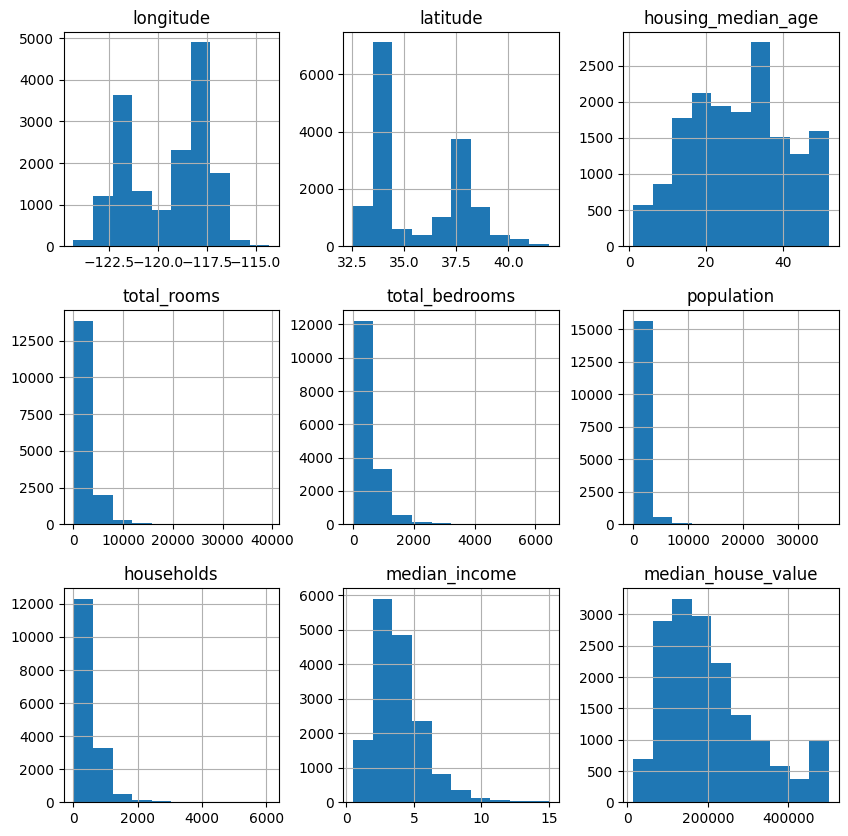

In [50]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(10, 10))

In [51]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11792,-121.21,38.83,21.0,3691.0,640.0,1758.0,603.0,3.5607,INLAND,151900.0
7124,-118.03,33.90,36.0,1143.0,193.0,826.0,188.0,5.3184,<1H OCEAN,171100.0
2197,-119.88,36.81,30.0,2288.0,474.0,1435.0,425.0,1.3221,INLAND,61200.0
16607,-120.63,35.59,9.0,5782.0,1184.0,3026.0,1130.0,2.6528,<1H OCEAN,113500.0
19611,-121.13,37.47,37.0,1995.0,448.0,1559.0,443.0,2.1833,INLAND,92700.0
...,...,...,...,...,...,...,...,...,...,...
17046,-122.26,37.48,34.0,4453.0,682.0,1805.0,672.0,5.6038,NEAR OCEAN,451300.0
15252,-117.32,33.01,29.0,3584.0,712.0,1619.0,667.0,4.1250,NEAR OCEAN,394400.0
9222,-120.43,36.99,16.0,1027.0,199.0,673.0,193.0,2.9688,INLAND,63800.0
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,NEAR OCEAN,410000.0


<Axes: >

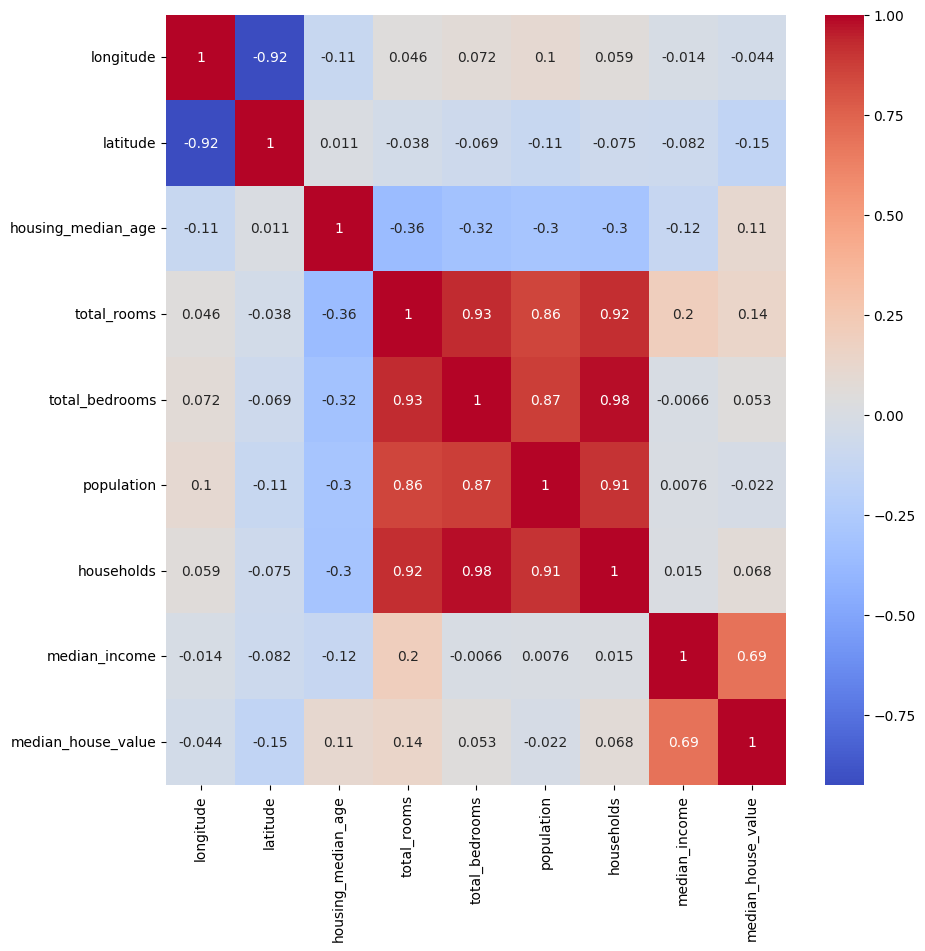

In [52]:
numbered_train_data = train_data.select_dtypes(include=['number'])  # Remove non-numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(numbered_train_data.corr(), annot=True, cmap="coolwarm")

# preprocess
reducing skweeness we use log

In [53]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

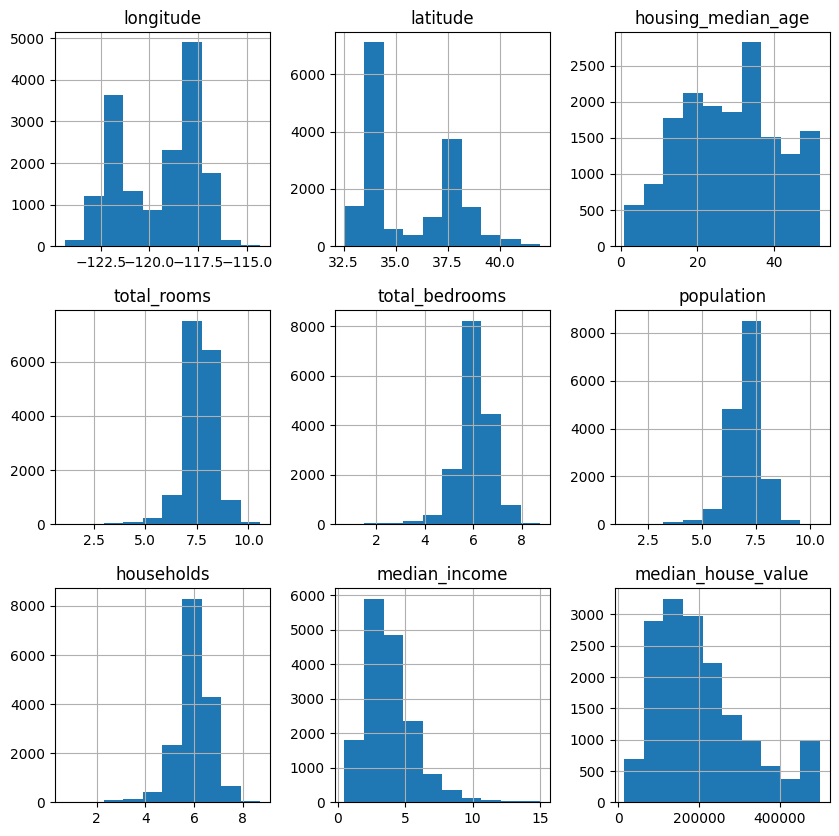

In [54]:
train_data.hist(figsize=(10, 10))

In [59]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))
train_data = train_data.drop(['ocean_proximity'], axis=1)

train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11792,-121.21,38.83,21.0,8.213924,6.463029,7.472501,6.403574,3.5607,151900.0,0,1,0,0,0
7124,-118.03,33.90,36.0,7.042286,5.267858,6.717805,5.241747,5.3184,171100.0,1,0,0,0,0
2197,-119.88,36.81,30.0,7.735870,6.163315,7.269617,6.054439,1.3221,61200.0,0,1,0,0,0
16607,-120.63,35.59,9.0,8.662678,7.077498,8.015327,7.030857,2.6528,113500.0,1,0,0,0,0
19611,-121.13,37.47,37.0,7.598900,6.107023,7.352441,6.095825,2.1833,92700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17046,-122.26,37.48,34.0,8.401558,6.526495,7.498870,6.511745,5.6038,451300.0,0,0,0,0,1
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,394400.0,0,0,0,0,1
9222,-120.43,36.99,16.0,6.935370,5.298317,6.513230,5.267858,2.9688,63800.0,0,1,0,0,0
14454,-117.27,32.83,39.0,7.537963,6.056784,6.692084,6.016157,3.8750,410000.0,0,0,0,0,1


<Axes: >

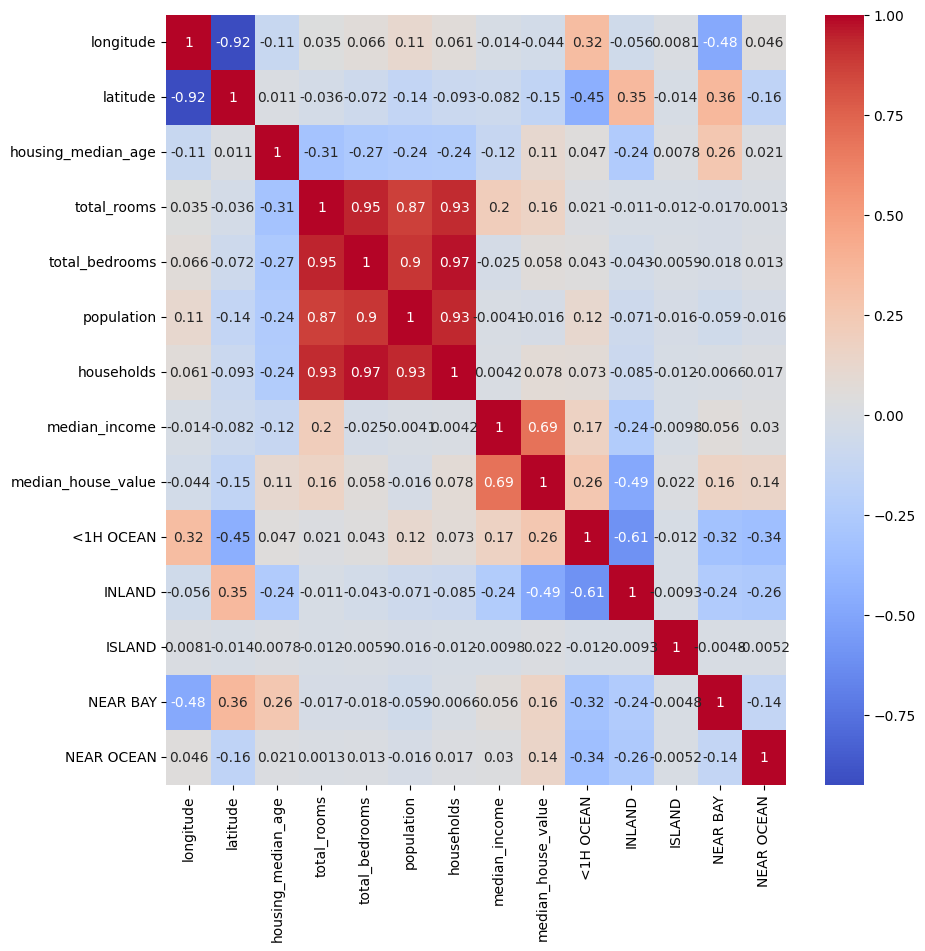

In [60]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

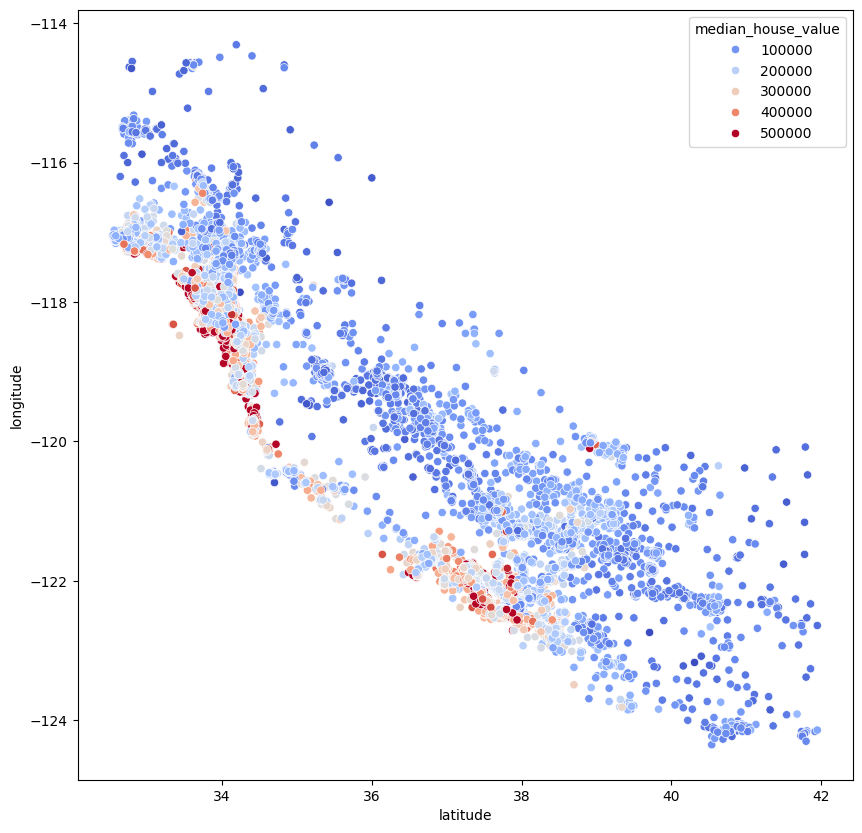

In [61]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value", palette="coolwarm")

#feature engg
creating extra data
- created 2 feature using the data

In [62]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

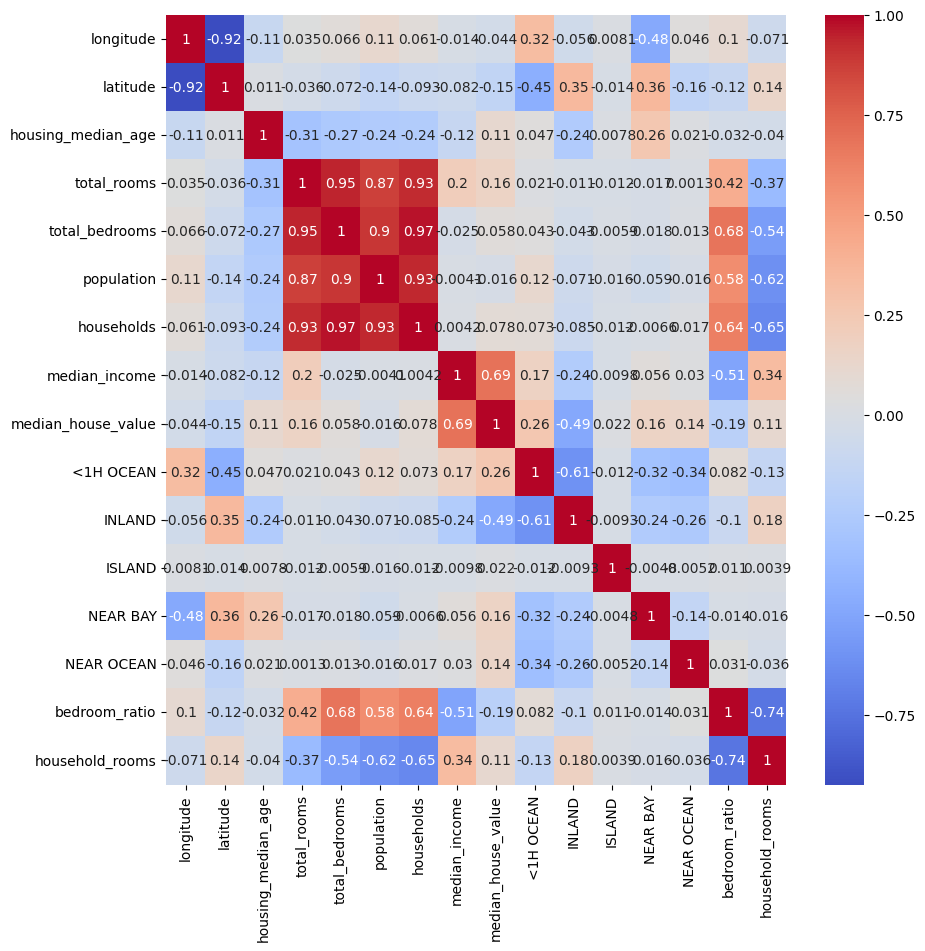

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

#linear regression

In [67]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [68]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int))
test_data = test_data.drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [69]:
reg.score(x_test, y_test)

0.6545114266874422

# test new input

In [71]:
import numpy as np
import pandas as pd

# Get user input
total_rooms = float(input("Enter total rooms: "))
total_bedrooms = float(input("Enter total bedrooms: "))
population = float(input("Enter population: "))
households = float(input("Enter households: "))
housing_median_age = float(input("Enter housing median age: "))
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
median_income = float(input("Enter median income: "))
ocean_proximity = input("Enter ocean proximity (options: 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN'): ")

# Apply log transformation (as in training)
total_rooms = np.log(total_rooms + 1)
total_bedrooms = np.log(total_bedrooms + 1)
population = np.log(population + 1)
households = np.log(households + 1)

# Create input dictionary
new_data = {
    "housing_median_age": [housing_median_age],
    "latitude": [latitude],
    "longitude": [longitude],
    "median_income": [median_income],
    "total_rooms": [total_rooms],
    "total_bedrooms": [total_bedrooms],
    "population": [population],
    "households": [households],
    "bedroom_ratio": [total_bedrooms / total_rooms],
    "household_rooms": [total_rooms / households]
}

# One-hot encoding for ocean proximity
ocean_categories = ["NEAR BAY", "INLAND", "NEAR OCEAN", "ISLAND", "<1H OCEAN"]
for category in ocean_categories:
    new_data[category] = [1 if ocean_proximity == category else 0]

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Ensure feature order matches training data
new_df = new_df[train_data.drop("median_house_value", axis=1).columns]

# Predict house price
predicted_price = reg.predict(new_df)
print(f"\n🏡 Predicted House Price: ${predicted_price[0]:,.2f}")


Enter total rooms: 4
Enter total bedrooms: 2
Enter population: 3
Enter households: 2
Enter housing median age: 23
Enter latitude: 32
Enter longitude: 32
Enter median income: 122
Enter ocean proximity (options: 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN'): NEAR BAY

🏡 Predicted House Price: $1,140,937.03
